# Radial coordinate asymptotics

What is asymptotic approximation to radiation field along a ray of fixed angle $\theta$ as $r$ increases?

Relevant exponential term is 

$$e^{i( Z x + \beta(Z) z}$$

and contains both x and z.  We let $x = r \sin \theta$ and $z = r \cos \theta$ to get 

$$e^{i( Z x + \beta z} = e^{\overbrace{i \big( Z \sin \theta + \beta(Z) \cos \theta \big)}^{g(Z)} r}$$

Recall that $\beta(Z) = \sqrt{k_0^2 n_0^2 - Z^2}$.   We want to find $g'(Z) = 0$.  This occurs when $\tan \theta = \frac{Z}{\beta(Z)}$ or $Z = k_0 n_0 \sin \theta$.  At this point, $g(Z) = i k_0 n_0$, and we want the path  in $\mathbb{C}$ along which the imaginary part of this is constant, i.e. along which $\text{Im}\, g(Z)  =  k_0n_0$.

We actually have all the parts we need.  We have that

$$
\begin{align}
\text{Im}\, g(Z) & = \text{Im}\, i ( Z \sin \theta + \beta(Z) \cos \theta)\\[.1cm]
                 & = \text{Re}\, ( Z \sin \theta + \beta(Z) \cos \theta ) \\[.1cm]
                 & = \sin \theta  \; \text{Re}\,Z + \cos \theta \;  \text{Re}\, \beta(Z) 
\end{align}
$$

Let $Z = x + i y$.  We found in another notebook in this folder that  $ \text{Re}\, \beta(Z)  = $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from IPython.display import HTML

plt.style.use('dark_background')

%matplotlib widget

In [2]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1, 1.44], wl=4e-6, symmetric=True)


In [3]:
def gA(Z, z=0):
    K = A.K0 * A.n0
    return 1j * np.sqrt(K**2 - Z**2, dtype=complex)

Look at contour plot of exponent

In [4]:
xs, ys = np.linspace(-20, 20, 1001), np.linspace(-10, 10, 1001)
Xs, Ys = np.meshgrid(xs, ys)
Zs = Xs + 1j * Ys

gsA = gA(Zs)

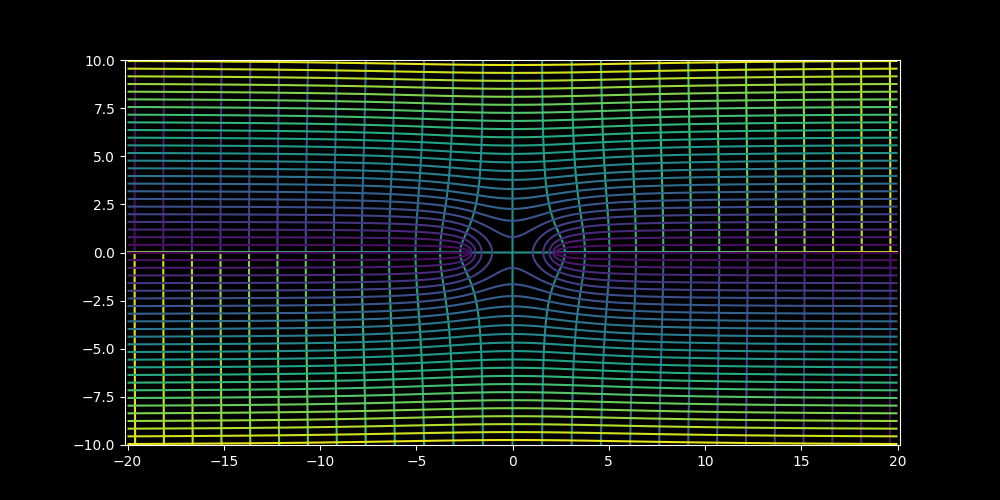

In [5]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,5))
ax.contour(Xs, Ys, gsA.real, levels=30)
ax.contour(Xs, Ys, gsA.imag, levels=30);
plt.axis('equal');

## Observations

- Zero derivative of exponent occurs at $Z = 0,$ for which $\text{Im}(g) = k_0n_0$ .

- The steepest descent path is therefore the contour of the imaginary component of $g$ going throught the origin, with contour value $k_0n_0$.

- Note that we also have branch points at $ Z = \pm k_0 n_0.$


## Steepest descent paths

### In Z plane

We want to keep the imaginary part of $g(Z) = i \sqrt{k_0^2n_0^2 - Z^2}$ constant at $\text{Im}(g(0)) = k_0 n_0$.  Using $Z = x + y i$ we calculate from the complex square root formula that 

$$ y = \pm \frac{k_0 n_0 x}{\sqrt{k_0^2n_0^2 + x^2}}$$

along this path.  We add this to the plot above

In [6]:
def sdp_A(x):
    K = A.K0 * A.n0
    return (K * x) / np.sqrt(K**2 + x**2)

In [7]:
y_sdp_A = sdp_A(xs)

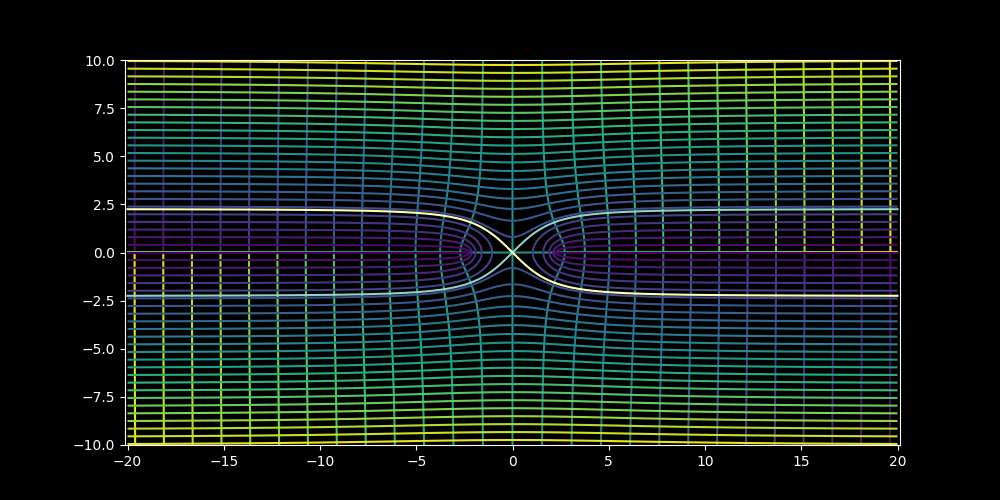

In [8]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,5))
ax.contour(Xs, Ys, gsA.real, levels=30)
ax.contour(Xs, Ys, gsA.imag, levels=30);
ax.plot(xs, y_sdp_A);
ax.plot(xs, -y_sdp_A);
plt.axis('equal');

### Adding in leaky mode locations

We can now overlay these paths onto our leaky mode propagation constant plots

In [9]:
A.wl = 4e-6

In [10]:
args = ('TE', 'guided')
xs2 = np.linspace(0, 20, 1001)
ys2 = -sdp_A(xs2)

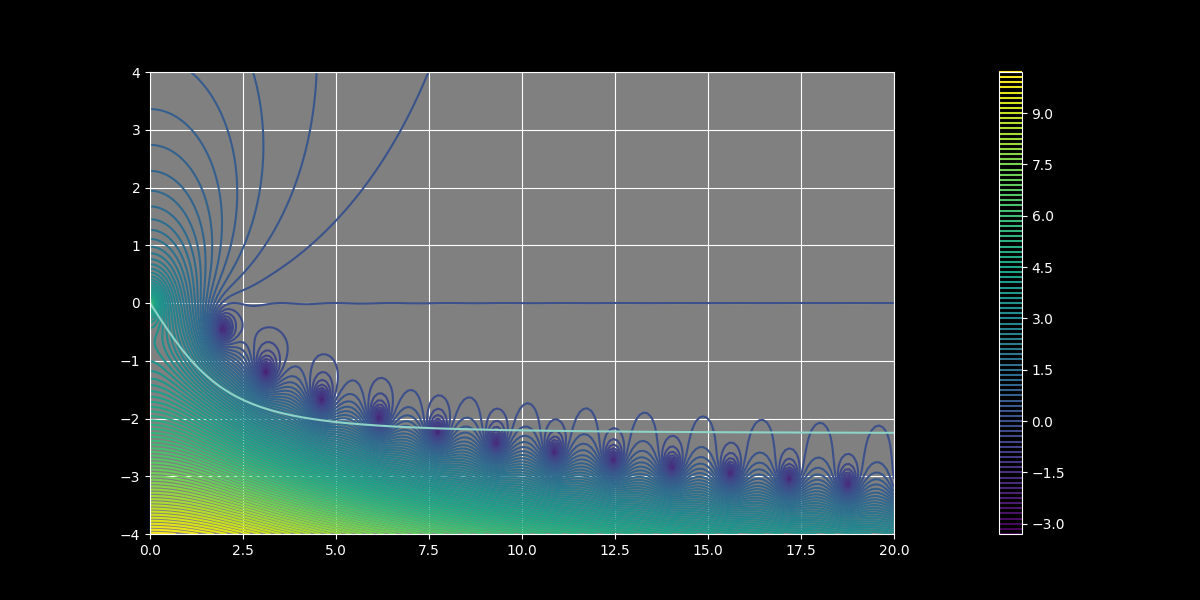

In [11]:
plotlogf(A.determinant_Z, 0, 20, -4, 4, *args, iref=200, rref=200, levels=120);
ax = plt.gca()
ax.plot(xs2, ys2);

As noted previously, there are a ton of modes between the path of integration and the steepest descent path at realistic input wavelengths.  At longer wavelengths there are only a few though!

# Hollow Core guide

How does this look with the hollow core guide?

In [12]:
D = SlabExact(scale=1e-5, Ts=[.3, 1, 8,1, .3],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=4e-6)

In [13]:
def gD(Z, z=0):
    KD = D.K0 * D.n0
    return 1j * np.sqrt(KD**2 - Z**2, dtype=complex)

Look at contour plot of exponent

In [14]:
xs, ys = np.linspace(-20, 20, 1001), np.linspace(-10, 10, 1001)
Xs, Ys = np.meshgrid(xs, ys)
Zs = Xs + 1j * Ys

gsD = gD(Zs)

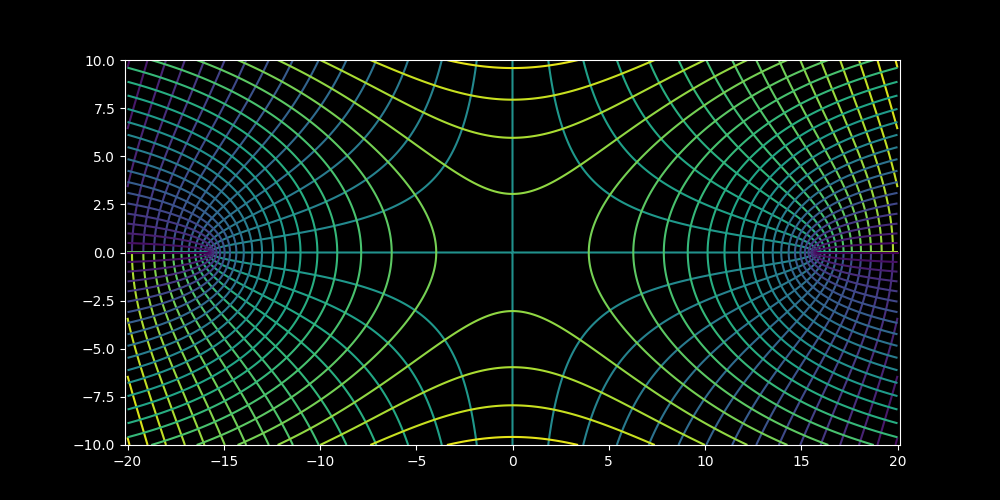

In [15]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,5))
ax.contour(Xs, Ys, gsD.real, levels=30)
ax.contour(Xs, Ys, gsD.imag, levels=30);
plt.axis('equal');

In [16]:
def sdp_D(x):
    KD = D.K0 * D.n0
    return (KD * x) / np.sqrt(KD**2 + x**2)

In [17]:
y_sdp_D = sdp_D(xs)

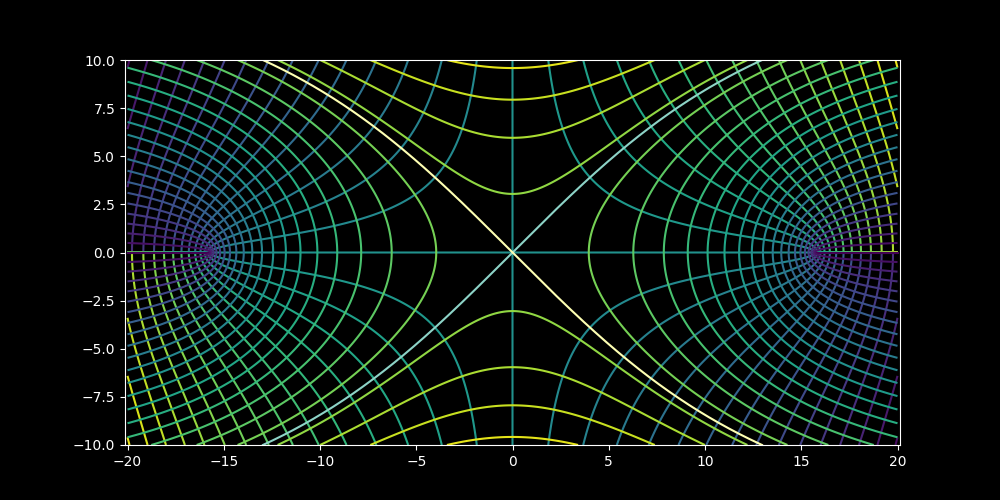

In [18]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,5))
ax.contour(Xs, Ys, gsD.real, levels=30)
ax.contour(Xs, Ys, gsD.imag, levels=30);
msk = np.where(np.abs(y_sdp_D)<10)
ax.plot(xs[msk],  y_sdp_D[msk]);
ax.plot(xs[msk], -y_sdp_D[msk]);
plt.axis('equal');

In [45]:
D.wl=6.88e-6

In [46]:
args = ('TE', 'guided')
xs3 = np.linspace(0, 2, 1001)
ys3 = -sdp_D(xs3)

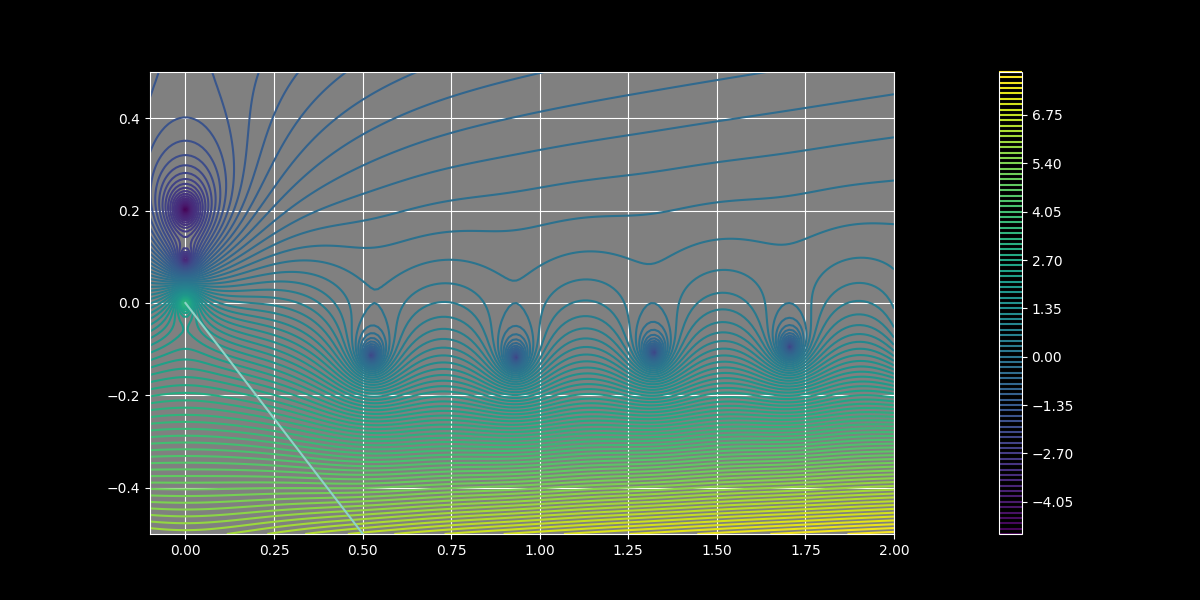

In [47]:
plotlogf(D.determinant_Z, -.1, 2, -.5, .5, *args, iref=200, rref=200, levels=120);
ax = plt.gca()
msk = np.where(np.abs(ys3)<.5)
ax.plot(xs3[msk], ys3[msk]);

# Examine fields of blow up guided modes

The zeros below the real axis appear to be real modes, but with pure blow up transverse behavior.

In [43]:
from scipy.optimize import newton

### Near longest resonant wavelength

0.27126257376143376

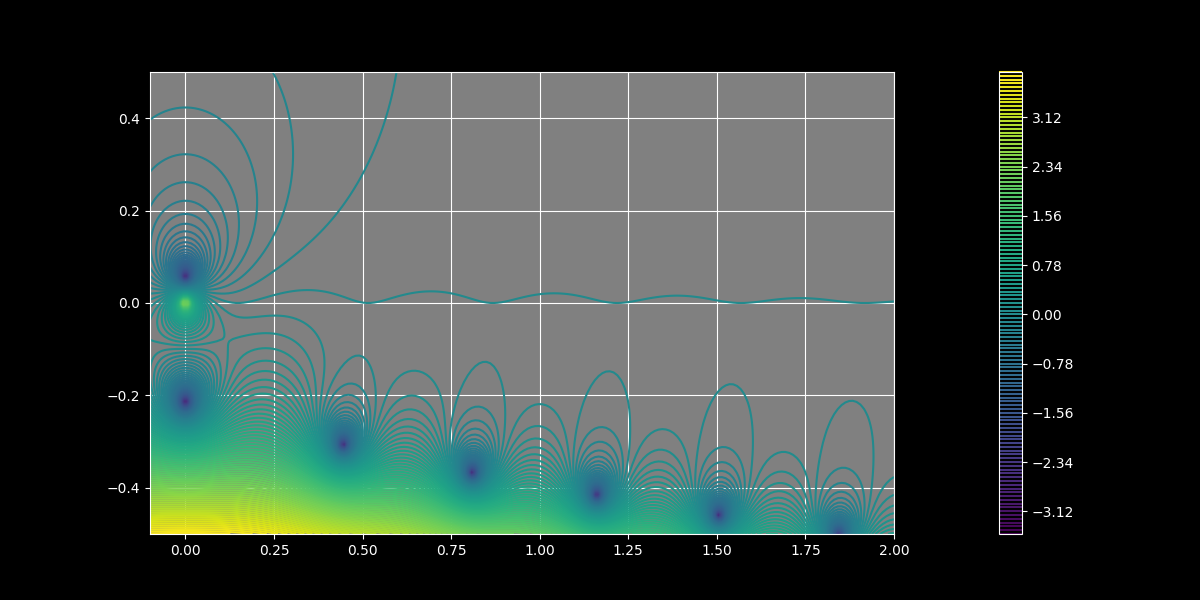

In [44]:
D.wl=2.4e-4
plotlogf(D.determinant_Z, -.1, 2, -.5, .5, *args, iref=200, rref=200, levels=120);
D.K0 * (D.n_high**2 - D.n_low**2)**.5

In [121]:
Z = newton(D.determinant_Z, np.array([-.2j]))
FZ = D.fields_Z(Z, mode_type='guided')

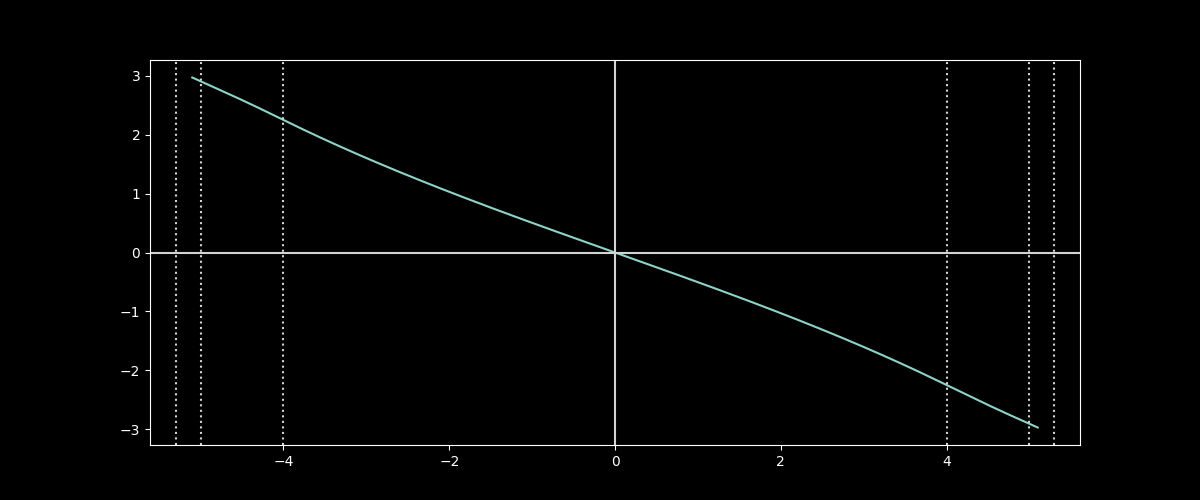

In [122]:
D.plot_field_1d(FZ, xs=np.linspace(-5.1,5.1,2000));

#### Near previous resonant wavelength

9.644891511517647

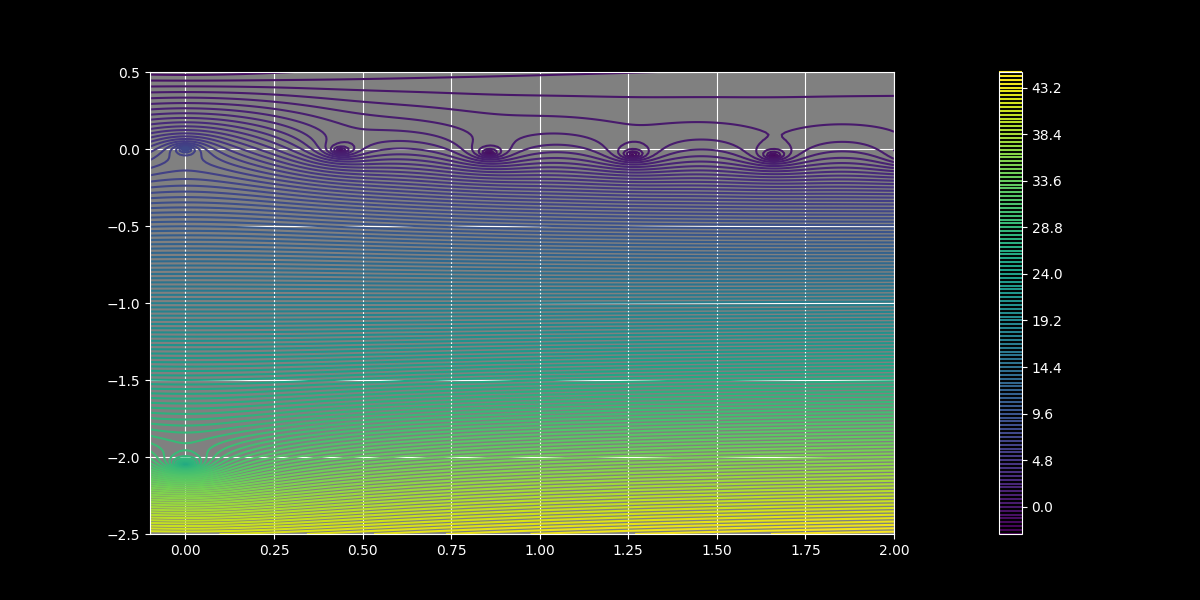

In [123]:
D.wl = 6.75e-6
args = ('TE', 'guided')
plotlogf(D.determinant_Z, -.1, 2, -2.5, .5, *args, iref=200, rref=200, levels=120);
D.K0 * (D.n_high**2 - D.n_low**2)**.5

In [124]:
D.wl = 6.75e-6
Z2 = newton(D.determinant_Z, np.array([-2j]))
FZ2 = D.fields_Z(Z2, mode_type='guided')

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

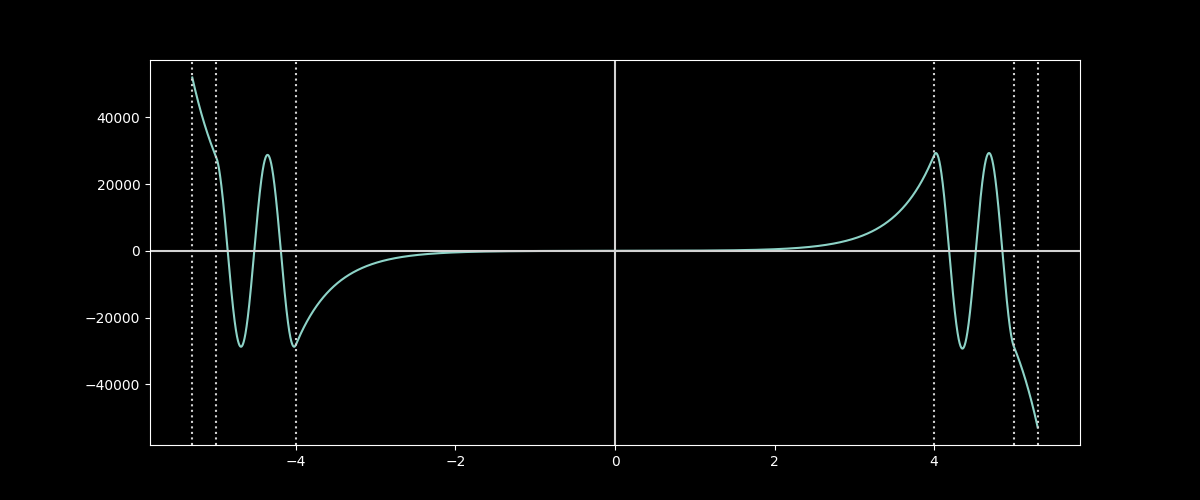

In [125]:
D.plot_field_1d(FZ2, xs=np.linspace(-5.3,5.3,10000))

### V number

Do the modes below the real axis also live between 0 and -V?  Seems that they do.

In [126]:
D.K0 * (D.n_high**2 - D.n_low**2)**.5

9.644891511517647